# 수화 이미지 분류 경진대회 EDA

이번 대회는 주어진 수화 이미지 숫자 1, 2, 3, 4, 5, 6, 7, 8, 9, 10-1, 10-2 중 이미지들을 올바른 라벨로 분류하는 대회입니다.

단순 이미지 분류 문제이지만 이미지 처리를 처음 시작하시는 분들은 아마도 막막하실 겁니다.

대회를 시작하기 앞서 어떤 데이터가 주어졌고 어떤 방식으로 활용할 수 있을지

데이터를 분석하고 시각화하며 인사이트를 얻어내는 작업이 필요합니다.

# 데이터 로드

필요한 패키지를 임포트하고 분석 환경을 적절히 설정해줍니다.

In [7]:
import os
import numpy as np
import warnings
warnings.filterwarnings(action='ignore') # 경고 메세지 숨김
from glob import glob
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import PIL
PIL.Image

<module 'PIL.Image' from 'c:\\Users\\smhrd\\anaconda3\\envs\\dacon\\lib\\site-packages\\PIL\\Image.py'>

주어진 데이터를 불러오기 위해 다음 함수를 사용하겠습니다.

함수의 인스턴스인 path에 이미지 데이터 파일의 경로를 입력하면 image와 label을 각각 array 값으로 return 해줍니다.

In [8]:
import pandas as pd
label_df = pd.read_csv('data/train.csv')
label_df.head()

,file_name,label
0,001.png,10-2
1,002.png,10-1
2,003.png,3
3,004.png,8
4,005.png,9


In [9]:
def load_CIFAR10(path):
    
    path = path
    images = []
    for filename in glob(path +"*"):
        #print(filename)
        for img in glob(filename):
            #print(img)
            an_img = PIL.Image.open(img) #read img
            img_array = np.array(an_img) #img to array
            images.append(img_array) #append array to training_images
    images = np.array(images)

    return images

In [10]:
training_images = load_CIFAR10(path='data/train/')

# 간단한 EDA

데이터를 분석하기 위해서는 먼저 적절한 탐색이 필요합니다.

이미지 데이터를 전반적으로 살펴보겠습니다.


## 이미지 크기 확인
먼저 이미지 데이터의 크기(shape)를 확인합니다.

In [11]:
print("train 이미지 크기:", training_images.shape)
print("train 라벨 크기:", label_df.shape)

train 이미지 크기: (858, 224, 224, 3)
train 라벨 크기: (858, 2)


shape의 출력값에서 (858, 224, 224, 3)는 (count, high pixel, width pixel, channels)를 의미합니다.

### count 
train 데이터에서 총 858개의 이미지가 존재한다고 볼 수 있습니다.

### Pixel
이미지 데이터는 픽셀(pixel)이라고 하는 작은 이미지를 직사각형 형태로 모은 것 입니다.     
각 픽셀은 단색의 직사각형인데,. 전체 이미지의 크기를 표현할 때는 (세로픽셀수 x 가로픽셀수) 형식으로 표현합니다.    
따라서 현재 이미지에서는 224개 픽셀 X 224개 픽셀로 구성되어 있습니다.

### channels
마지막 숫자 3 값은 RGB 값을 나타냅니다.     
픽셀의 색을 숫자로 표현하는 방식을 색공간(color space)라고 하는데,     
대표적인 색공간으로는 RGB(Red-Green-Blue), 그레이스케일(gray scale), HSV(Hue-Saturation-Value) 방식이 있습니다.


## RGB 이미지 출력
RGB 색공간에서 색은 적(Red), 녹(Green), 청(Blue)의 3가지 색의 명도를 뜻하는 숫자 3개가 합쳐진 벡터로 표현됩니다

8비트 부호없는 정수를 사용하는 경우 (255, 0, 0)은 빨간색, (0, 255, 0)은 녹색, (0, 0, 255)는 파란색 입니다.

예시로 0번 이미지를 출력하겨 R, G, B channel의 이미지를 살펴보겠습니다.

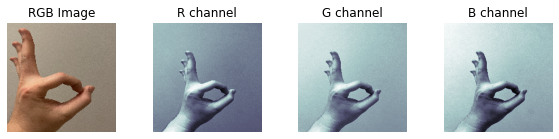

In [12]:
img_rgb = training_images[0]

plt.figure(figsize=(10, 2))

plt.subplot(141)
plt.imshow(img_rgb[50:200, 50:200, :])
plt.axis("off")
plt.title("RGB Image")

plt.subplot(142)
plt.imshow(img_rgb[:, :, 0], cmap=plt.cm.bone)
plt.axis("off")
plt.title("R channel")

plt.subplot(143)
plt.imshow(img_rgb[:, :, 1], cmap=plt.cm.bone)
plt.axis("off")
plt.title("G channel")

plt.subplot(144)
plt.imshow(img_rgb[:, :, 2], cmap=plt.cm.bone)
plt.axis("off")
plt.title("B channel")

plt.show()

## 라벨 이미지 출력

그럼 random 함수를 사용해 랜덤하게 10개 이미지를 출력해보겠습니다.

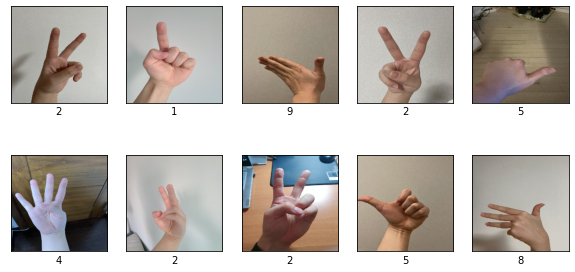

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[10,5])
for i in range(10):
    import random
    num = random.randint(0,858)
    plt.subplot(2, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(label_df.label[num])
    plt.imshow(training_images[num])
plt.show()

다양한 종류의 수화 이미지들이 존재함을 알 수 있습니다.     

## 라벨 분포 확인

이제 실제로 라벨이 어떻게 되어있는지 확인하기 위해 라벨의 unique값을 확인합니다.

In [14]:
print(np.unique(label_df.label))

['1' '10-1' '10-2' '2' '3' '4' '5' '6' '7' '8' '9']


문자열으로 '1', '2', '3', '4', '5', '6', '7', '8', '9', '10-1', '10-2' 이 들어있군요!

그렇다면 라벨 별 클래스의 분포를 알아보겠습니다.

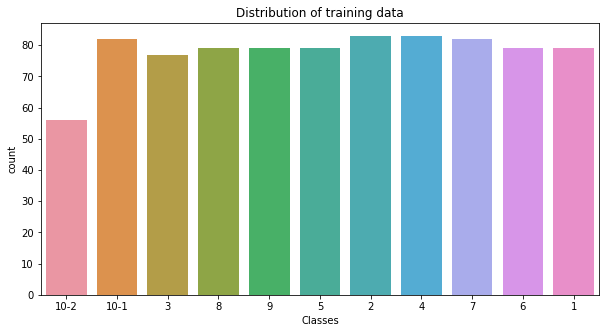

In [15]:
plt.figure(figsize=[10,5])
sns.countplot(label_df.label.ravel())
plt.title('Distribution of training data')
plt.xlabel('Classes')
plt.show()

10-2를 제외하곤 모든 클래스가 거의 균일하게 분포하는 것을 확인했습니다.    
실제로 학습에 하기 앞서 라벨을 모두 정수형으로 바꿔주어야 하므로     
문자열을 숫자로 처리하는 작업을 해보겠습니다.

이후 딥러닝 모델을 사용하기 위해서 pytorch에서는 예측해야할 라벨을 0부터 읽어드리므로    
0부터 10까지 범위로 치환하겠습니다.     
따라서 라벨 '10-1'는 10으로, 라벨 '10-2'는 0으로 바꿔주겠습니다.

In [16]:
label_df['label'][label_df['label'] == '10-1'] = 10 ## label : 10-1 -> 10
label_df['label'][label_df['label'] == '10-2'] = 0 ## Label : 10-2 -> 0
label_df['label'] = label_df['label'].apply(lambda x : int(x)) ## Dtype : object -> int

In [17]:
print(np.unique(label_df.label))

[ 0  1  2  3  4  5  6  7  8  9 10]


정상적으로 0부터 10까지 정수형으로 치환된 것을 확인할 수 있습니다.     
또한 모델링 이후 다시 문자열으로 역변환을 해야하는 점 잊지말아주세요!  

이제 이 노트북에서 데이터를 둘러보는 작업은 마무리하겠습니다.

여러분은 어떤 인사이트를 얻으셨나요?

이번 EDA를 통해 어떤 방식으로 분석을 진행해야겠다는 자그마한 인사이트를 얻으셨으면 좋겠습니다.

여러분도 여러분만의 EDA를 진행하시고 코드공유에 올려주세요!

좋아요를 많이 받으시는 분께는 데이콘 후드가 제공됩니다!